In [5]:
import matplotlib.pyplot as plt
from scipy.ndimage import filters 
import numpy




def computeharrisresponse(im,sigma):

    #derivatives	
    imx=numpy.zeros(im.shape)	
    filters.gaussian_filter(im,	(sigma,	sigma),(0,1),	imx)
    imy=numpy.zeros(im.shape)			
    filters.gaussian_filter(im,	(sigma,	sigma),(1,0),	imy)

    #computecomponentsoftheHarrismatrix
    Wxx=filters.gaussian_filter(imx*imx,sigma)
    Wxy=filters.gaussian_filter(imx*imy,sigma)
    Wyy=filters.gaussian_filter(imy*imy,sigma)
    #determinantandtrace
    Wdet=Wxx*Wyy-Wxy**2
    Wtr=Wxx+Wyy
    return Wdet/Wtr


In [6]:
def getharrispoints(harrisim,threshold,min_dist=10):

    #Findtopcornercandidatesaboveathreshold
    maxnum=0
    for i in harrisim:
        for z in i:
            z=numpy.nan_to_num(z)
            if z>maxnum:
                maxnum=z
            else:
                pass
    cornerthreshold=maxnum*threshold
    #cornerthreshold=numpy.nantonum(cornerthreshold)
    harrisimt=(harrisim>cornerthreshold)*1
    #Getcoordinatesofcandiates
    coords=numpy.array(harrisimt.nonzero()).T
    #...andtheirvalues
    candidatevalues=[harrisim[c[0],c[1]]for c in coords]
    #Sortcandidates
    index=numpy.argsort(candidatevalues)
    #storeallowedpointlocationsinarray
    allowedlocations=numpy.zeros(harrisim.shape)
    allowedlocations[min_dist:-min_dist,min_dist:-min_dist]=1
    #selectthebestpointstakingmin_distanceintoaccount
    filteredcoords=[]
    for i in index:
        if allowedlocations[coords[i,0],coords[i,1]]==1:
            filteredcoords.append(coords[i])
            allowedlocations[(coords[i,0]-min_dist):(coords[i,0]+min_dist),(coords[i,1]-min_dist):(coords[i,1]+min_dist)]=0
    return filteredcoords

In [7]:
def plotharrispoints(image,filteredcoords):

    plt.figure()
    plt.gray()
    plt.imshow(image)
    plt.plot([p[1]for p in filteredcoords],[p[0]for p in filteredcoords],'*')
    plt.axis('off')
    plt.show()
    plt.show()

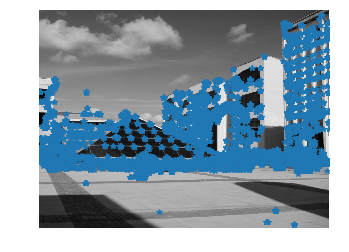

In [31]:
import numpy
from PIL import Image
numpy.seterr(invalid='ignore')
im=numpy.array(Image.open('Images/kuzey.jpg').convert('L'))
harrisim=computeharrisresponse(im,0.5)
# filteredcoords=getharrispoints(harrisim,0.4,10)
filteredcoords=np.array(np.where((np.nan_to_num(harrisim)>0.04*np.max((np.nan_to_num(harrisim)))))).T
plotharrispoints(im,filteredcoords)


In [18]:
import numpy as np

In [21]:
np.array(np.where(harrisim>0.01*np.max(harrisim))).T

array([], shape=(0, 2), dtype=int64)

In [25]:
np.max(np.nan_to_num(harrisim))

970.8117755365172

In [27]:
np.array(np.where((np.nan_to_num(harrisim)>0.01*np.max((np.nan_to_num(harrisim)))))).T

array([[   0, 1550],
       [   0, 1551],
       [   0, 1554],
       ...,
       [1188, 1581],
       [1188, 1582],
       [1194,  702]], dtype=int64)